In [1]:
import fastf1
from fastf1 import plotting
from fastf1 import utils
import matplotlib as mpl
from matplotlib import pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.lines as mlines

In [30]:
# Enable the cache
fastf1.Cache.enable_cache('cache')
# Load the session data
session = fastf1.get_session(2022, 'Saudi Arabia', 'R')
# Collect all race laps
laps = session.load()
laps = session.laps

core           INFO 	Loading laps for Bahrain Grand Prix - Race [v2.2.0-alpha0]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['23', '27', '18', '47', '14', '63', '11', '55', '1', '6', '4', '44', '31', '24', '77', '3', '20', '10', '16', '22']


In [31]:
pace=laps.pick_driver('LEC')

In [32]:
tyrecolor = []
for row in pace.Compound:
    if row == 'SOFT':
        tyrecolor.append('r')
    elif row == 'MEDIUM':   
        tyrecolor.append('y')
    elif row == 'HARD':   
        tyrecolor.append('w')
pace['tyrecolor']=tyrecolor

C:\Users\iande\AppData\Local\Temp/ipykernel_5160/3062449262.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pace['tyrecolor']=tyrecolor


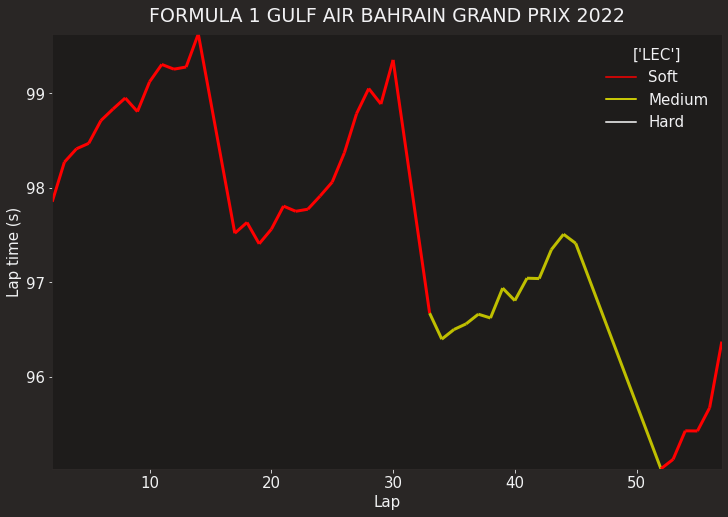

In [35]:
x = pace.LapNumber.loc[pace.IsAccurate==True]
y = pace.LapTime.dt.total_seconds().loc[pace.IsAccurate==True]
z = pace.Stint.loc[pace.IsAccurate==True]

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be numlines x points per line x 2 (x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the line collection object, setting the colormapping parameters.
# Have to set the actual values used for colormapping separately.
lc = LineCollection(segments, cmap=ListedColormap(pace.tyrecolor))
lc.set_array(z)
lc.set_linewidth(3)

plotting.setup_mpl()
fig = plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = '15'
plt.gca().add_collection(lc)
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())

plt.xlabel('Lap')
plt.ylabel('Lap time (s)')
plt.legend(labels=['Soft','Medium','Hard'], frameon=False,
          handles=[mlines.Line2D([], [], color='red',markersize=15, label='Soft'),
                  mlines.Line2D([], [], color='yellow',markersize=15, label='Medium'),
                  mlines.Line2D([], [], color='white',markersize=15, label='Hard')],
          title=f'{pace.Driver.unique()}')
plt.title(f'{session.event.official_event_name}')
plt.show()

plt.show()